# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries
import importlib
import auxlib; importlib.reload(auxlib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxlib' from 'c:\\Users\\Usuario\\Desktop\\Synt\\auxlib\\__init__.py'>

# Main variables

In [2]:
L = 40

training = ['para', 'ferro']

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

first_neurons = [i for i in range(1,11)]
middle_neurons = [20 * i for i in range(1,6)]
last_neurons = [50 * i for i in range(3,21)]

neurons = first_neurons + middle_neurons + last_neurons

seed = 15

# Directory

In [3]:
folder = auxlib.folders(type='dnn', training=training)
folder_figs = auxlib.folders_figs(type='dnn', training=training)

# Synthetic data

In [7]:
# Initialize the synthetic image generator

data = auxlib.SyntheticImagesGen(training=training, L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 0.5207045078277588 seconds
Generating synthetic data...
Done!
Elapsed time: 0.03990793228149414 seconds


In [8]:
# Print the number of samples in each class

l, m, n, o = 0, 0, 0, 0

for i in range(len(list(train_labels))):
	if train_labels[i] == 0:
		l += 1
	elif train_labels[i] == 1:
		m += 1
	elif train_labels[i] == 2:
		n += 1
	elif train_labels[i] == 3:
		o += 1
print("Number of paramagnetic samples: ", l)
print("Number of ferromagnetic samples: ", m)
print("Number of neel samples: ", n)
print("Number of stripe samples: ", o)
print("Total number of samples: ", l + m + n + o)

Number of paramagnetic samples:  3334
Number of ferromagnetic samples:  6666
Number of neel samples:  0
Number of stripe samples:  0
Total number of samples:  10000


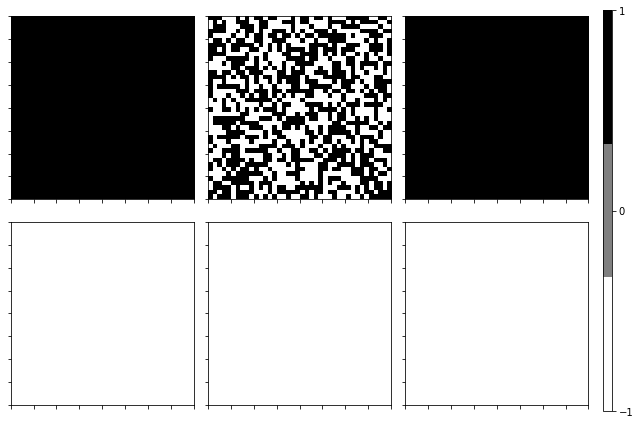

In [9]:
# Random graphs

lattices_to_graph = [train_images[10 * i].reshape((L, L)) for i in range(6)]

auxlib.latticeGraph(lattices_to_graph, L)

# Training of Neural Network

In [ ]:
# DNN Model
def dnn_model(L, neurons, training=['all'], kernel_regularizer=None, callbacks=None):
	if training == ['all']:
		training = ['para', 'ferro', 'neel', 'stripe']

	dnn = Sequential()

	dnn.add(Dense(neurons, activation='relu', 
								kernel_regularizer=kernel_regularizer,
								input_shape=(L*L,)))
	dnn.add(Dropout(0.2))
	dnn.add(Dense(len(training), activation='softmax'))



	dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	dnn.summary()

	dnn.fit(train_images, train_labels, 
			epochs=50, batch_size=20,
			validation_data=(test_images, test_labels), 
			callbacks=[callbacks],
			verbose=False)
	return dnn

In [22]:
# Callback to stop training when accuracy is high enough

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):

        if(logs.get('val_accuracy') > 0.999):
            print("\nAccuracy is high enough, cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [ ]:
for neuron in tqdm(neurons, desc=f"Generating DNN models", unit="neuron"):
	np.random.seed(seed)
	if neuron==1 or neuron==2:
		kernel_regularizer=tf.keras.regularizers.l2(0.001)
	else:   
		kernel_regularizer=tf.keras.regularizers.l2(0.01)

	dnn = dnn_model(L, neuron, training=training, kernel_regularizer=kernel_regularizer, 
					callbacks=callbacks)

	# Saving the model
	dnn.save(os.path.join(folder, f'dnn_{neuron}.h5'))

Generating DNN models:   0%|          | 0/33 [00:00<?, ?neuron/s]

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 1)                 1601      
                                                                 
 dropout_34 (Dropout)        (None, 1)                 0         
                                                                 
 dense_69 (Dense)            (None, 2)                 4         
                                                                 
Total params: 1605 (6.27 KB)
Trainable params: 1605 (6.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Generating DNN models:   3%|▎         | 1/33 [00:48<26:00, 48.77s/neuron]

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 2)                 3202      
                                                                 
 dropout_35 (Dropout)        (None, 2)                 0         
                                                                 
 dense_71 (Dense)            (None, 2)                 6         
                                                                 
Total params: 3208 (12.53 KB)
Trainable params: 3208 (12.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   6%|▌         | 2/33 [00:55<12:33, 24.30s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 3)                 4803      
                                                                 
 dropout_36 (Dropout)        (None, 3)                 0         
                                                                 
 dense_73 (Dense)            (None, 2)                 8         
                                                                 
Total params: 4811 (18.79 KB)
Trainable params: 4811 (18.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   9%|▉         | 3/33 [00:59<07:28, 14.95s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 4)                 6404      
                                                                 
 dropout_37 (Dropout)        (None, 4)                 0         
                                                                 
 dense_75 (Dense)            (None, 2)                 10        
                                                                 
Total params: 6414 (25.05 KB)
Trainable params: 6414 (25.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  12%|█▏        | 4/33 [01:06<05:39, 11.69s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 5)                 8005      
                                                                 
 dropout_38 (Dropout)        (None, 5)                 0         
                                                                 
 dense_77 (Dense)            (None, 2)                 12        
                                                                 
Total params: 8017 (31.32 KB)
Trainable params: 8017 (31.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  15%|█▌        | 5/33 [01:16<05:07, 10.99s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 6)                 9606      
                                                                 
 dropout_39 (Dropout)        (None, 6)                 0         
                                                                 
 dense_79 (Dense)            (None, 2)                 14        
                                                                 
Total params: 9620 (37.58 KB)
Trainable params: 9620 (37.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, cancelling training!


Generating DNN models:  18%|█▊        | 6/33 [01:26<04:49, 10.74s/neuron]

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 7)                 11207     
                                                                 
 dropout_40 (Dropout)        (None, 7)                 0         
                                                                 
 dense_81 (Dense)            (None, 2)                 16        
                                                                 
Total params: 11223 (43.84 KB)
Trainable params: 11223 (43.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  21%|██        | 7/33 [01:33<04:03,  9.38s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 8)                 12808     
                                                                 
 dropout_41 (Dropout)        (None, 8)                 0         
                                                                 
 dense_83 (Dense)            (None, 2)                 18        
                                                                 
Total params: 12826 (50.10 KB)
Trainable params: 12826 (50.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  24%|██▍       | 8/33 [01:42<03:55,  9.42s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 9)                 14409     
                                                                 
 dropout_42 (Dropout)        (None, 9)                 0         
                                                                 
 dense_85 (Dense)            (None, 2)                 20        
                                                                 
Total params: 14429 (56.36 KB)
Trainable params: 14429 (56.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  27%|██▋       | 9/33 [01:47<03:11,  7.97s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 10)                16010     
                                                                 
 dropout_43 (Dropout)        (None, 10)                0         
                                                                 
 dense_87 (Dense)            (None, 2)                 22        
                                                                 
Total params: 16032 (62.62 KB)
Trainable params: 16032 (62.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  30%|███       | 10/33 [02:06<04:25, 11.56s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 20)                32020     
                                                                 
 dropout_44 (Dropout)        (None, 20)                0         
                                                                 
 dense_89 (Dense)            (None, 2)                 42        
                                                                 
Total params: 32062 (125.24 KB)
Trainable params: 32062 (125.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  33%|███▎      | 11/33 [02:13<03:42, 10.12s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 40)                64040     
                                                                 
 dropout_45 (Dropout)        (None, 40)                0         
                                                                 
 dense_91 (Dense)            (None, 2)                 82        
                                                                 
Total params: 64122 (250.48 KB)
Trainable params: 64122 (250.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  36%|███▋      | 12/33 [02:16<02:44,  7.85s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 60)                96060     
                                                                 
 dropout_46 (Dropout)        (None, 60)                0         
                                                                 
 dense_93 (Dense)            (None, 2)                 122       
                                                                 
Total params: 96182 (375.71 KB)
Trainable params: 96182 (375.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  39%|███▉      | 13/33 [02:20<02:13,  6.66s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 80)                128080    
                                                                 
 dropout_47 (Dropout)        (None, 80)                0         
                                                                 
 dense_95 (Dense)            (None, 2)                 162       
                                                                 
Total params: 128242 (500.95 KB)
Trainable params: 128242 (500.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  42%|████▏     | 14/33 [02:23<01:47,  5.68s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 100)               160100    
                                                                 
 dropout_48 (Dropout)        (None, 100)               0         
                                                                 
 dense_97 (Dense)            (None, 2)                 202       
                                                                 
Total params: 160302 (626.18 KB)
Trainable params: 160302 (626.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  45%|████▌     | 15/33 [02:27<01:32,  5.16s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 150)               240150    
                                                                 
 dropout_49 (Dropout)        (None, 150)               0         
                                                                 
 dense_99 (Dense)            (None, 2)                 302       
                                                                 
Total params: 240452 (939.27 KB)
Trainable params: 240452 (939.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  48%|████▊     | 16/33 [02:36<01:43,  6.10s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 200)               320200    
                                                                 
 dropout_50 (Dropout)        (None, 200)               0         
                                                                 
 dense_101 (Dense)           (None, 2)                 402       
                                                                 
Total params: 320602 (1.22 MB)
Trainable params: 320602 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  52%|█████▏    | 17/33 [02:50<02:16,  8.54s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 250)               400250    
                                                                 
 dropout_51 (Dropout)        (None, 250)               0         
                                                                 
 dense_103 (Dense)           (None, 2)                 502       
                                                                 
Total params: 400752 (1.53 MB)
Trainable params: 400752 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  55%|█████▍    | 18/33 [03:00<02:16,  9.12s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 300)               480300    
                                                                 
 dropout_52 (Dropout)        (None, 300)               0         
                                                                 
 dense_105 (Dense)           (None, 2)                 602       
                                                                 
Total params: 480902 (1.83 MB)
Trainable params: 480902 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  58%|█████▊    | 19/33 [03:17<02:40, 11.45s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 350)               560350    
                                                                 
 dropout_53 (Dropout)        (None, 350)               0         
                                                                 
 dense_107 (Dense)           (None, 2)                 702       
                                                                 
Total params: 561052 (2.14 MB)
Trainable params: 561052 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  61%|██████    | 20/33 [03:28<02:27, 11.37s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 400)               640400    
                                                                 
 dropout_54 (Dropout)        (None, 400)               0         
                                                                 
 dense_109 (Dense)           (None, 2)                 802       
                                                                 
Total params: 641202 (2.45 MB)
Trainable params: 641202 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  64%|██████▎   | 21/33 [03:42<02:23, 12.00s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 450)               720450    
                                                                 
 dropout_55 (Dropout)        (None, 450)               0         
                                                                 
 dense_111 (Dense)           (None, 2)                 902       
                                                                 
Total params: 721352 (2.75 MB)
Trainable params: 721352 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  67%|██████▋   | 22/33 [04:04<02:44, 14.98s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 500)               800500    
                                                                 
 dropout_56 (Dropout)        (None, 500)               0         
                                                                 
 dense_113 (Dense)           (None, 2)                 1002      
                                                                 
Total params: 801502 (3.06 MB)
Trainable params: 801502 (3.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  70%|██████▉   | 23/33 [04:22<02:40, 16.05s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 550)               880550    
                                                                 
 dropout_57 (Dropout)        (None, 550)               0         
                                                                 
 dense_115 (Dense)           (None, 2)                 1102      
                                                                 
Total params: 881652 (3.36 MB)
Trainable params: 881652 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  73%|███████▎  | 24/33 [04:44<02:38, 17.66s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 600)               960600    
                                                                 
 dropout_58 (Dropout)        (None, 600)               0         
                                                                 
 dense_117 (Dense)           (None, 2)                 1202      
                                                                 
Total params: 961802 (3.67 MB)
Trainable params: 961802 (3.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  76%|███████▌  | 25/33 [05:00<02:18, 17.32s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 650)               1040650   
                                                                 
 dropout_59 (Dropout)        (None, 650)               0         
                                                                 
 dense_119 (Dense)           (None, 2)                 1302      
                                                                 
Total params: 1041952 (3.97 MB)
Trainable params: 1041952 (3.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  79%|███████▉  | 26/33 [05:18<02:02, 17.55s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 700)               1120700   
                                                                 
 dropout_60 (Dropout)        (None, 700)               0         
                                                                 
 dense_121 (Dense)           (None, 2)                 1402      
                                                                 
Total params: 1122102 (4.28 MB)
Trainable params: 1122102 (4.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  82%|████████▏ | 27/33 [05:35<01:43, 17.32s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 750)               1200750   
                                                                 
 dropout_61 (Dropout)        (None, 750)               0         
                                                                 
 dense_123 (Dense)           (None, 2)                 1502      
                                                                 
Total params: 1202252 (4.59 MB)
Trainable params: 1202252 (4.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  85%|████████▍ | 28/33 [05:51<01:25, 17.06s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 800)               1280800   
                                                                 
 dropout_62 (Dropout)        (None, 800)               0         
                                                                 
 dense_125 (Dense)           (None, 2)                 1602      
                                                                 
Total params: 1282402 (4.89 MB)
Trainable params: 1282402 (4.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  88%|████████▊ | 29/33 [06:09<01:09, 17.33s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 850)               1360850   
                                                                 
 dropout_63 (Dropout)        (None, 850)               0         
                                                                 
 dense_127 (Dense)           (None, 2)                 1702      
                                                                 
Total params: 1362552 (5.20 MB)
Trainable params: 1362552 (5.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, cancelling training!


Generating DNN models:  91%|█████████ | 30/33 [06:50<01:12, 24.30s/neuron]

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 900)               1440900   
                                                                 
 dropout_64 (Dropout)        (None, 900)               0         
                                                                 
 dense_129 (Dense)           (None, 2)                 1802      
                                                                 
Total params: 1442702 (5.50 MB)
Trainable params: 1442702 (5.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, cancelling training!


Generating DNN models:  94%|█████████▍| 31/33 [07:16<00:49, 24.90s/neuron]

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 950)               1520950   
                                                                 
 dropout_65 (Dropout)        (None, 950)               0         
                                                                 
 dense_131 (Dense)           (None, 2)                 1902      
                                                                 
Total params: 1522852 (5.81 MB)
Trainable params: 1522852 (5.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  97%|█████████▋| 32/33 [07:39<00:24, 24.28s/neuron]


Accuracy is high enough, cancelling training!
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 1000)              1601000   
                                                                 
 dropout_66 (Dropout)        (None, 1000)              0         
                                                                 
 dense_133 (Dense)           (None, 2)                 2002      
                                                                 
Total params: 1603002 (6.11 MB)
Trainable params: 1603002 (6.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models: 100%|██████████| 33/33 [08:02<00:00, 14.63s/neuron]


Accuracy is high enough, cancelling training!


# Loading simulated images to test the NN

In [24]:
densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

In [25]:
# Initializing loader and saver

loader_init = auxlib.loader_and_saver(os.getcwd())

# Loading simulated images

sim_images, temperature = loader_init.simulatedImages(-1)


Loading simulated images...


Loading arrays:   1%|          | 1/156 [00:00<00:17,  8.89array/s]

Loading arrays: 100%|██████████| 156/156 [00:02<00:00, 68.39array/s]


Files loaded!
Data of density p = 1. succesfully loaded.


# Predictions

In [26]:
for neuron in neurons:
	index = neurons.index(neuron)
	sim_images = [array.reshape((251, L*L)) for array in sim_images]	
	model_path = os.path.join(folder, f'dnn_{neuron}.h5')

	dnn = keras.models.load_model(model_path)

	prediction = dnn.predict(sim_images[0], verbose=False)/len(sim_images)
	for i in tqdm(range(1, len(sim_images)), 
							desc=f"Predicting ({neuron} neurons)", unit="repetitions"):
		sim_im = sim_images[i]
		prediction += dnn.predict(sim_im, verbose=False)/len(sim_images)

	# Saving the predictions
	if training == ['all']:
		columns = ['temperature', 'paramagnetic', 'ferromagnetic', 'neel', 'stripe']
	else:
		columns = ['temperature'] + training

	temperature = np.arange(0.0, 5.02, 0.02).reshape(251,1)
	combined_array = np.concatenate((temperature, prediction), axis=1)
	prediction_df = pd.DataFrame(combined_array, columns=columns)
	prediction_df.to_csv(os.path.join(folder, f'predictions_{neuron}.csv'), index=False)

Predicting (1000 neurons): 100%|██████████| 155/155 [00:24<00:00,  6.41repetitions/s]


In [27]:
prediction.shape

(251, 2)

# Plotting probability for 8 and 1000 neurons

Tc (1000 neurons) = 2.3149374067977404
Tc (8 neurons) = 2.4548369279464137


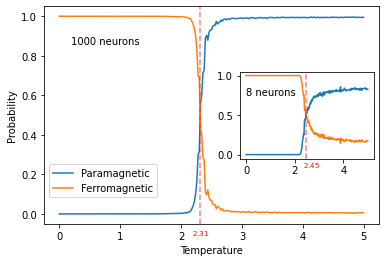

In [31]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

prediction = pd.read_csv(folder+f'/predictions_1000.csv', header=0).to_numpy(float)
temperature, para, ferro = prediction.T

fig, ax = plt.subplots()
ax.plot(temperature, para, label='Paramagnetic')
ax.plot(temperature, ferro, label='Ferromagnetic')
if max(ferro)<0.5:
	tc = 0
else:
	index_half = np.where(ferro > 0.5)[0][-1]
	tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
	ax.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)
	ax.text(tc, -0.07, rf'${round(tc,2)}$', color='red', 
		verticalalignment='top', horizontalalignment='center', fontsize=7)
print(f'Tc (1000 neurons) = {tc}')

ax.text(0.2, 0.9, '1000 neurons', color='black', 
		verticalalignment='top', horizontalalignment='left', fontsize=10)

prediction = pd.read_csv(folder+f'/predictions_8.csv', header=0).to_numpy(float)
temperature, para, ferro = prediction.T
ax_inset = inset_axes(ax, width="40%", height="40%", loc='center right')

ax_inset.plot(temperature, para, label='Paramagnetic')
ax_inset.plot(temperature, ferro, label='Ferromagnetic')
if max(ferro)<0.5:
	tc = 0
else:
	index_half = np.where(ferro > 0.5)[0][-1]
	tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
	ax_inset.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)
	ax.text(4., 0.27, rf'${round(tc,2)}$', color='red', 
	verticalalignment='top', horizontalalignment='left', fontsize=7)     

ax_inset.text(0.0, 0.85, '8 neurons', color='black', 
		verticalalignment='top', horizontalalignment='left', fontsize=10)


ax.set_xlabel('Temperature')
ax.set_ylabel('Probability')
ax.legend(loc = 'lower left', bbox_to_anchor=(0., 0.1))
print(f'Tc (8 neurons) = {tc}')
plt.savefig(os.path.join(folder_figs, f'neurons_8_and_1000.pdf'))
plt.show()

# Calculating critical temperature

Prediction for 1 neurons in hidden layer
T_c = 4.946384432013725


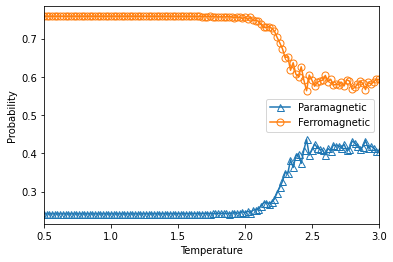

Prediction for 2 neurons in hidden layer
T_c = 2.4667468865542643


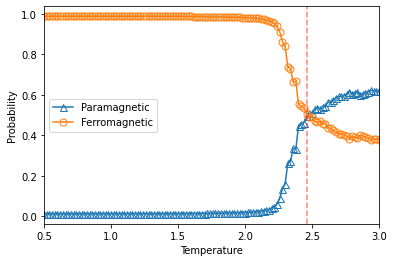

Prediction for 3 neurons in hidden layer
T_c = 2.456842068423795


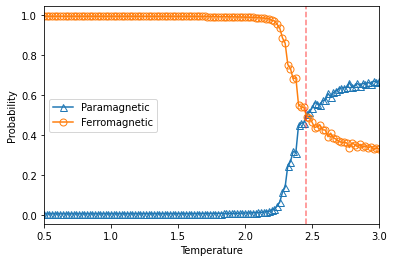

Prediction for 4 neurons in hidden layer
T_c = 2.4418863320098705


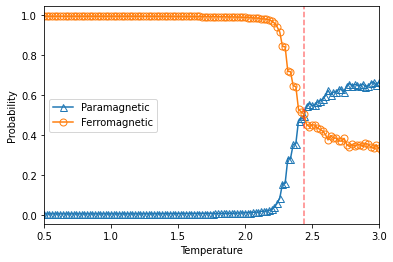

Prediction for 5 neurons in hidden layer
T_c = 2.441339862092992


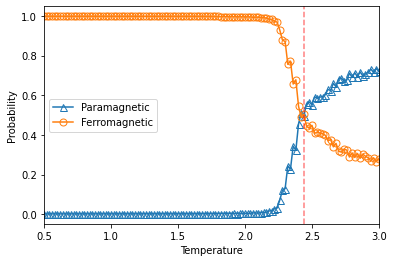

Prediction for 6 neurons in hidden layer
T_c = 2.422319263044348


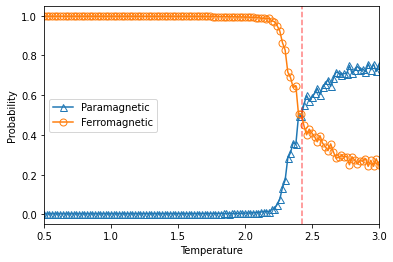

Prediction for 7 neurons in hidden layer
T_c = 2.3996675953851088


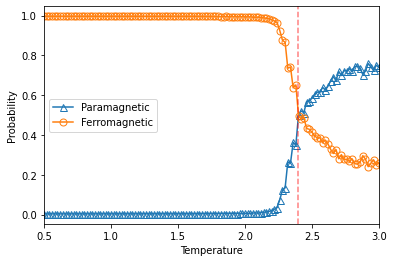

Prediction for 8 neurons in hidden layer
T_c = 2.4548369279464137


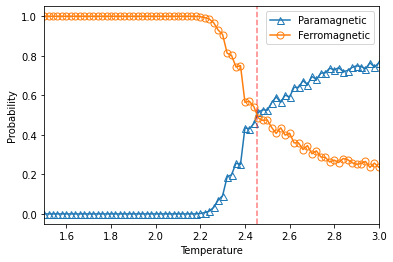

Prediction for 9 neurons in hidden layer
T_c = 2.406881211390522


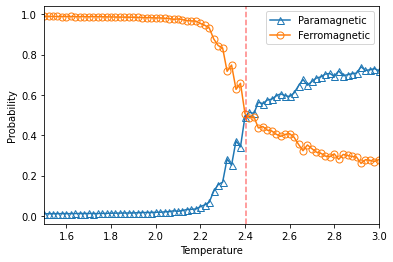

Prediction for 10 neurons in hidden layer
T_c = 2.5632602069303854


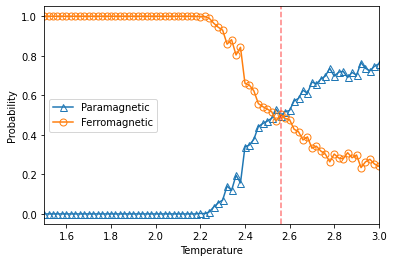

Prediction for 20 neurons in hidden layer
T_c = 2.393232635151389


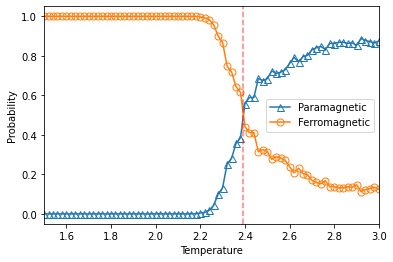

Prediction for 40 neurons in hidden layer
T_c = 2.3816048045316003


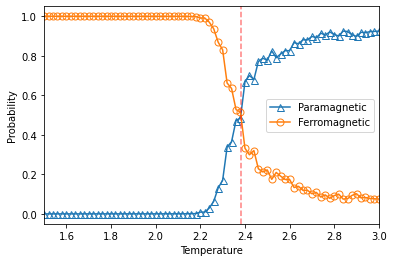

Prediction for 60 neurons in hidden layer
T_c = 2.388697909487162


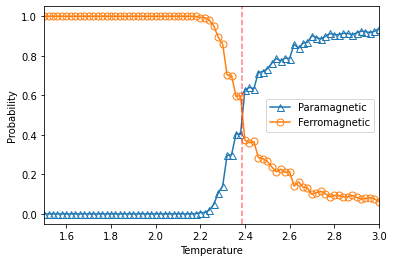

Prediction for 80 neurons in hidden layer
T_c = 2.3939492564289786


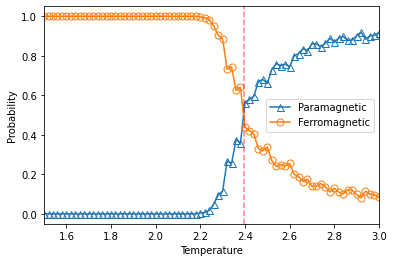

Prediction for 100 neurons in hidden layer
T_c = 2.381948398719785


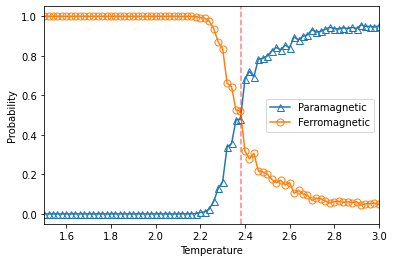

Prediction for 150 neurons in hidden layer
T_c = 2.3366326271410527


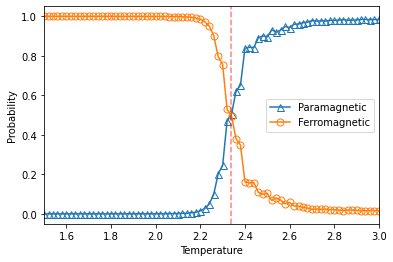

Prediction for 200 neurons in hidden layer
T_c = 2.319557031964461


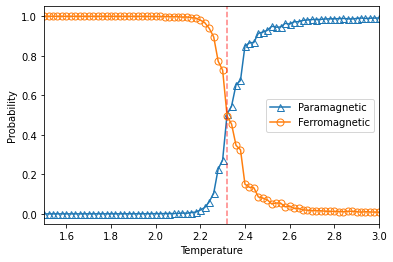

Prediction for 250 neurons in hidden layer
T_c = 2.358644227540748


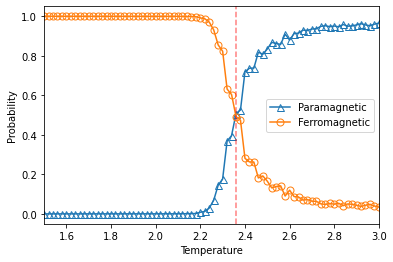

Prediction for 300 neurons in hidden layer
T_c = 2.326273834966277


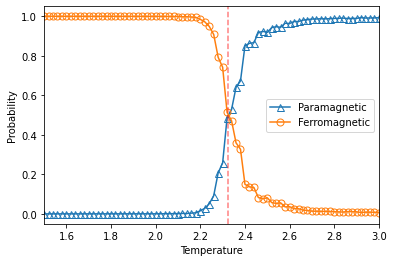

Prediction for 350 neurons in hidden layer
T_c = 2.317918332882012


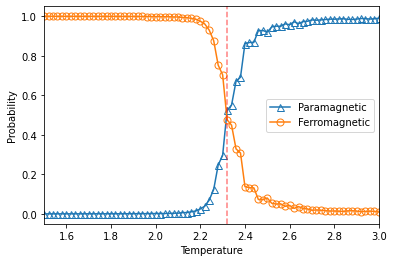

Prediction for 400 neurons in hidden layer
T_c = 2.319260953092235


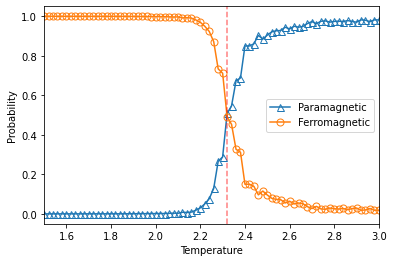

Prediction for 450 neurons in hidden layer
T_c = 2.3170408563613267


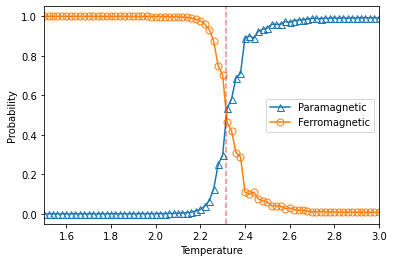

Prediction for 500 neurons in hidden layer
T_c = 2.316756843252447


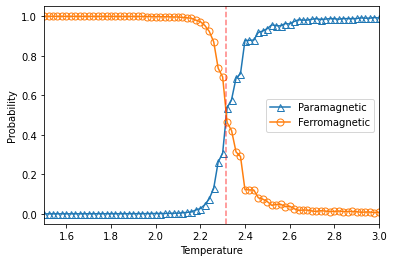

Prediction for 550 neurons in hidden layer
T_c = 2.317562477253224


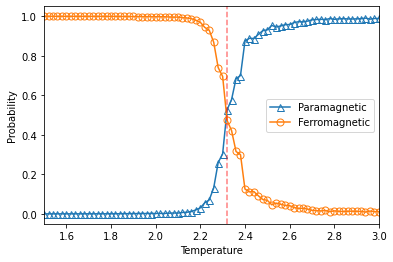

Prediction for 600 neurons in hidden layer
T_c = 2.3164907342859524


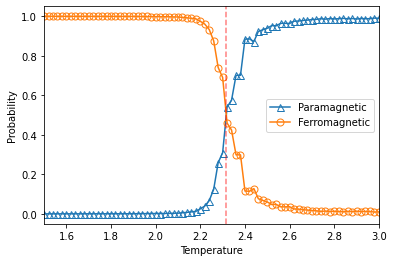

Prediction for 650 neurons in hidden layer
T_c = 2.319358156336507


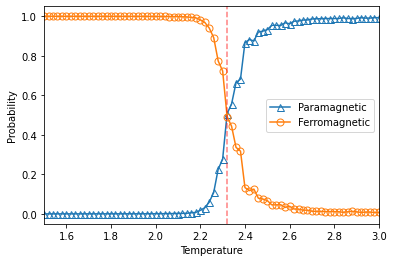

Prediction for 700 neurons in hidden layer
T_c = 2.3452975998106065


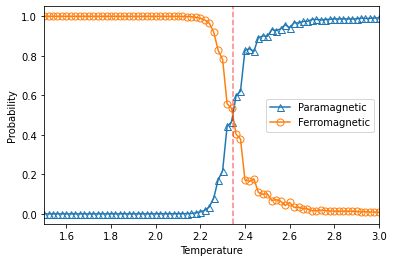

Prediction for 750 neurons in hidden layer
T_c = 2.316100437604829


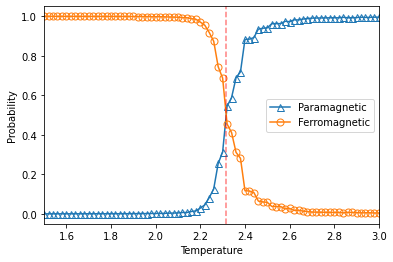

Prediction for 800 neurons in hidden layer
T_c = 2.3168252040740644


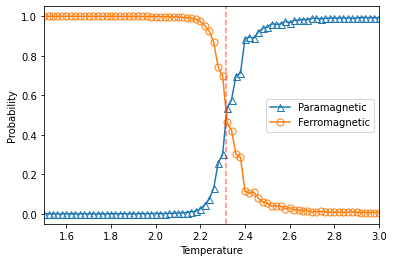

Prediction for 850 neurons in hidden layer
T_c = 2.3180611281537047


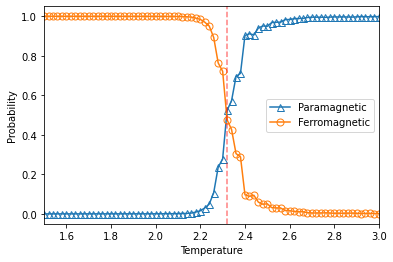

Prediction for 900 neurons in hidden layer
T_c = 2.318278283613469


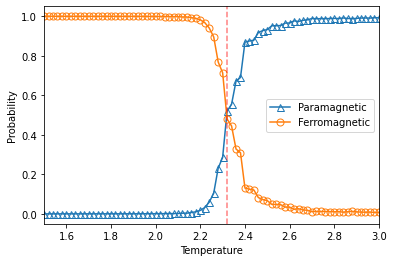

Prediction for 950 neurons in hidden layer
T_c = 2.3186080091992674


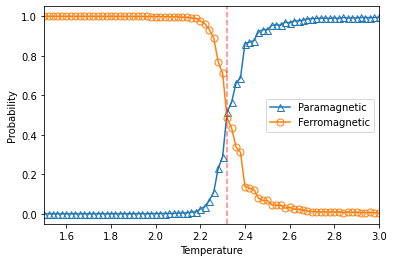

Prediction for 1000 neurons in hidden layer
T_c = 2.3149374067977404


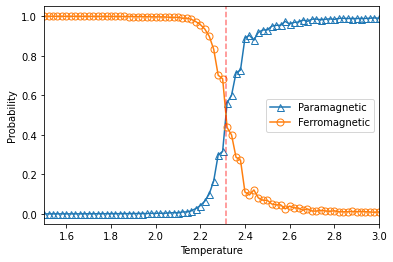

In [ ]:
critical_temperatures = []

for neuron in neurons:
	prediction = pd.read_csv(folder+f'/predictions_{neuron}.csv', header=0).to_numpy(float)
	temperature, para, ferro = prediction.T

	print(f'Prediction for {neuron} neurons in hidden layer')

	plt.figure()
	plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
	plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)

	if max(ferro)<0.5:
		tc = 0
	else:
		index_half = np.where(ferro > 0.5)[0][-1]
		if index_half == 250:
			index_half = 249
		tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
		plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

	critical_temperatures.append(tc)
	print(f'T_c = {tc}')

	if tc==0:
		plt.xlim((0, 5))
	else:
		plt.xlim((tc-1, tc+1))

	plt.xlabel('Temperature')
	plt.ylabel('Probability')
	plt.legend()

	plt.savefig(os.path.join(folder_figs, f'plot_{neuron}_neurons.pdf'))
	plt.show()

In [38]:
temp = pd.DataFrame((np.concatenate((np.array(neurons).reshape(len(neurons),1), 
                                    np.array(critical_temperatures).reshape(len(neurons),1)),axis=1)), 
                                    columns=['Neurons','Temperature'])
temp.to_csv(os.path.join(folder, 'critical_temperatures.csv'), index=False)

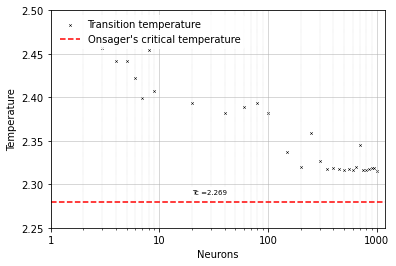

In [40]:
import matplotlib.ticker as ticker

temp = pd.read_csv(os.path.join(folder, f'critical_temperatures.csv'))

plt.figure()
plt.scatter(temp['Neurons'][2:],temp['Temperature'][2:], marker='x', s=7, linewidth=0.5 ,color='black', label='Transition temperature')
for i in (1, 2, 3, 4, 5, 20):
	neuron = i
	#plt.annotate(f'n = {int(temp["Neurons"][neuron])}', xy=(temp['Neurons'][neuron],temp['Temperature'][neuron]), 
	#			xytext=(temp['Neurons'][neuron],temp['Temperature'][neuron]+0.015), textcoords='data',
	#			ha='right', va='bottom',
	#			fontsize=14, 
	#			bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.2))

plt.axhline(y=2.28, color = 'red', linestyle = '--', label = "Onsager's critical temperature")
plt.xscale('log') 
plt.xlabel('Neurons')
plt.ylabel('Temperature')



plt.text(20, 2.295, rf'Tc ={2.269}', color='black', bbox=dict(boxstyle='round', fc='white', ec='none'),
        verticalalignment='top', horizontalalignment='left', fontsize=7)

plt.ylim((2.25, 2.5))
plt.xlim((1, 1200))
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10, subs=[1]))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))
plt.grid(which='major', axis='both', linestyle='-', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon = True, edgecolor='white', facecolor='white')
plt.savefig(os.path.join(folder_figs, 'critical_temperatures.pdf'))
plt.show()

# Graphing the predictions of each feature and different number of neurons

Feature: para


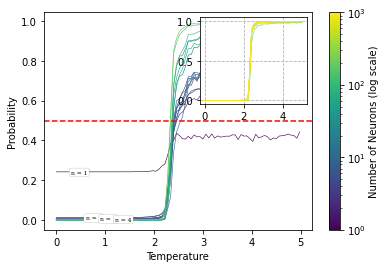

Feature: ferro


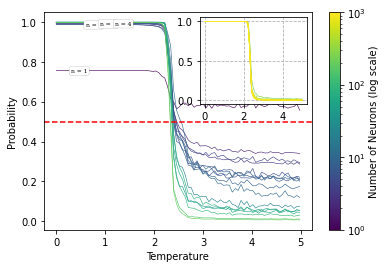

In [43]:
from matplotlib.colors import LogNorm
features = ['para', 'ferro']

first_neurons = [i for i in range(1, 11)]
middle_neurons = [20 * i for i in range(1, 6)]
last_neurons = [50 * i for i in range(3, 21)]

neurons = first_neurons + middle_neurons + last_neurons

cmap = plt.get_cmap('viridis')  # ('coolwarm')

# Use LogNorm for logarithmic scaling of the color mapping
norm = LogNorm(vmin=1, vmax=1000)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)


for feature in features:
    print(f'Feature: {feature}')
    fig, ax = plt.subplots()
    ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')  # Inset
    
    index = features.index(feature) + 1
    
    # Main plot: n <= 200
    for neuron in neurons:
        data_np = pd.read_csv(os.path.join(folder, f'predictions_{neuron}.csv'), header=0).to_numpy(float)
        temperature, para, ferro = data_np.T
        data = [temperature, para, ferro]
        alternating_indices = np.arange(0, len(data[0]), 3)
        
        # Plot n <= 200 in the main axis
        if neuron <= 200:
            ax.plot(data[0][alternating_indices], data[index][alternating_indices],'-', linewidth=0.6, color=cmap(norm(neuron)))
            if neuron in (1, 2, 3, 4):
                ax.annotate(f'n = {neuron}', xy=(1.0, data[index][50]), 
                            xytext=(0.3*(neuron), data[index][50]-0.01), textcoords='data',
                            font = 'serif', fontsize=6,
                            bbox=dict(boxstyle='round', fc='white', ec='black', linewidth=0.1, pad=0.3))
        # Plot n > 200 in the inset axis
        else:
            ax_inset.plot(data[0][alternating_indices], data[index][alternating_indices],'-', linewidth=0.6, color=cmap(norm(neuron)))
            ax_inset.grid(linestyle='--')

    # Main plot settings
    ax.axhline(y=0.5, color='r', linestyle='--')
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Probability')
    
    # Add the colorbar with logarithmic scaling to the main plot
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Number of Neurons (log scale)')
    
    # Save the figure
    plt.savefig(os.path.join(folder_figs, f'all_neurons_{feature}_1-1000.pdf'))
    plt.show()
